In [2]:
import sys
!{sys.executable} -m pip install json_stream
import numpy as np
import pandas as pd
import json_stream
import json

Defaulting to user installation because normal site-packages is not writeable


In [43]:
with open("dawn-event-data.json") as f:
    data = json.load(f)
    print(len(data))
    print("DONE!")

11058699
DONE!


In [158]:
# Get player pos
def player_data(id):
  pos = [x for x in data if x['userId'] == id]
  return pos

def get_pos(d):
  pos = [x['position'] for x in d]
  x = [pos[0] for pos in pos]
  y = [pos[1] for pos in pos]
  z = [pos[2] for pos in pos]
  return x,y,z

def close_enough(pos1, pos2):
  return ((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2 + (pos1[2] - pos2[2])**2)**0.5 <= 5

def get_players_near_pos(d, pos):
  return [event['userId'] for event in d if close_enough(event['position'], pos)]

def get_event(d, event):
  events = [x for x in d if event in x['events']]
  return events

def get_unique_times(d):
  times = list(set([x['time'] for x in d]))
  return times

In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [88]:
def plot_players_and_events(players, event):
  fig = plt.figure()
  ax = plt.axes(projection ='3d')

  for i in players:
    color = (np.random.random(), np.random.random(), np.random.random())
    player = player_data(i)
    events = get_event(player, event)
    x,y,z = get_pos(player)
    ex, ey, ez = get_pos(events)
    ax.scatter(ex, ey, ez, marker="o", label=f'Player {i}, {event}', color=color)
    ax.plot3D(x, y, z, label=f'Player {i}', color=color)
    ax.scatter(x[0],y[0],z[0], marker="x", label=f'Player {i} start', color=color)

  ax.legend()
  ax.set_xlabel('x-axis')
  ax.set_ylabel('y-axis')
  ax.set_zlabel('z-axis')
  ax.set_title('Plot of position and position of events')
  plt.show()


In [159]:
# Stratisfy the data by every 100 events and search within to check for any hand holding and any nearby players
step = 100
idx = 0

interactions = []

while idx < len(data):
  # Get all events during this chunk of time
  events = data[idx:idx + step]
  hand_hold_event = [(event['userId'], event['position']) for event in events if "hand_held" in event["events"]]
  if hand_hold_event:
    people = get_players_near_pos(events, hand_hold_event[0][1])
    if len(people) > 1:
      interactions.append(people)

  idx += step

# The list of groups of handholders
interactions


[[246, 253, 227, 253, 259, 262],
 [445, 447, 442],
 [498, 502],
 [415, 506],
 [286, 514, 515],
 [529, 518, 530],
 [19, 178],
 [544, 546],
 [513, 328],
 [88, 159, 159],
 [583, 109],
 [607, 609],
 [410, 419, 420],
 [671, 672],
 [663, 600],
 [528, 377],
 [707, 630, 708, 709],
 [701, 710],
 [564, 565],
 [565, 745],
 [329, 109],
 [357, 304],
 [565, 604],
 [759, 702],
 [780, 781],
 [784, 783, 779],
 [631, 700],
 [345, 82, 527],
 [511, 515, 357],
 [821, 822, 823],
 [826, 75],
 [320, 501],
 [473, 345],
 [845, 847],
 [139, 139],
 [945, 946],
 [947, 953],
 [712, 694],
 [704, 728],
 [669, 995, 840, 945, 994, 993],
 [701, 695],
 [1024, 945, 949],
 [780, 527],
 [63, 34],
 [1056, 1058, 1036, 1057],
 [1060, 1059, 1061, 1062],
 [1061, 1070],
 [604, 347],
 [693, 689],
 [781, 784],
 [1089, 1090],
 [1090, 1092],
 [1105, 1105],
 [63, 34],
 [765, 600],
 [1129, 1130, 1131, 1132],
 [1141, 1143, 1144],
 [1152, 1153, 1119],
 [807, 762],
 [1157, 1143, 1130],
 [1172, 1143, 1173],
 [795, 851, 926],
 [306, 1176, 1

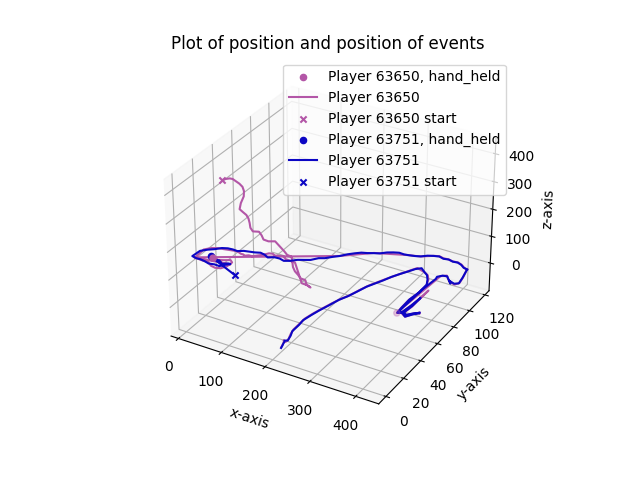

In [146]:
# Plot a pair of handholders to see their path
%matplotlib widget
plot_players_and_events([63650, 63751], "hand_held")

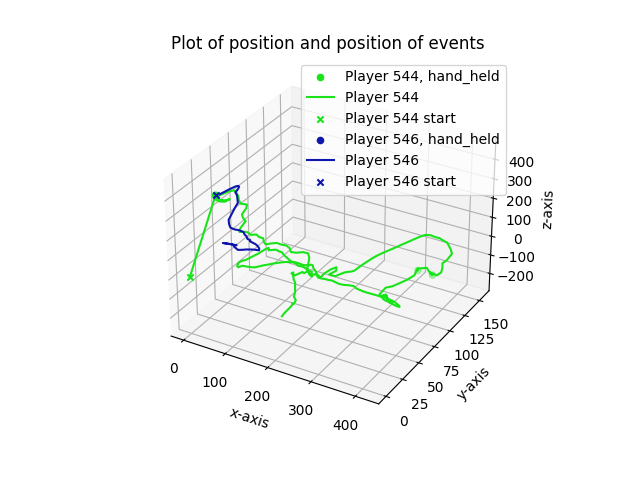

In [173]:
%matplotlib widget
plot_players_and_events([544, 546], "hand_held")

In [175]:
def get_player_interactions(player):
  return [x for x in interactions if player in x]

def get_timeframe_of_interaction(interaction):
  idx = interactions.index(interaction)
  first = idx * 100
  last = first + 100
  return data[first]['time'], data[last]['time']


In [177]:
get_timeframe_of_interaction(get_player_interactions(544)[0])

(1664339230011, 1664339231033)